In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import feature_selection
%matplotlib inline

## Датасет - рейтинги компьютерных игр

Вам нужно построить логистическую регрессию для предсказания рейтинга игры по специальной шкале (будем считать для простоты, что рейтинги закодированы определенным образом). Распределение значений таргета Rating представлено ниже.

In [64]:
df_sales = pd.read_csv('video_games_sales.csv')

#### Распределение таргета

<AxesSubplot:xlabel='Rating', ylabel='cnt'>

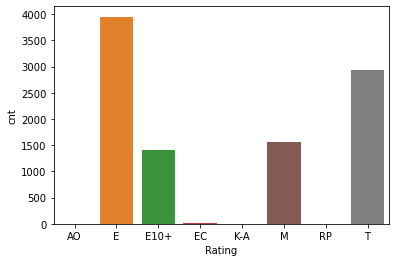

In [65]:
df_sales_gr = df_sales.groupby('Rating').agg({'User_Score': 'count'})
sns.barplot(x='Rating', y='cnt', data=pd.DataFrame(np.concatenate((np.array(df_sales_gr.index).reshape(-1, 1), df_sales_gr.values), axis=1), columns=['Rating', 'cnt']))

In [66]:
df_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 1

Определите, какие из признаков в датасете категориальные, порядковые, непрерывные. Выпишите признак и его тип ниже

Platform - категориальный признак
Year_of_Release -  непрерывные признак
Genre - категориальный признак
Publisher - порядковые признак
Developer - порядковые признак
NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales -  непрерывные признак
Critic_Score, Critic_Count, User_Score, User_Count - -  непрерывные признак

Как распределяются непрерывныеу признаки? Постройте графики их распределений. Проведите тест на нормальность распределения для двух выбранных вами признаков. Какое получилось p-value? Что это значит?

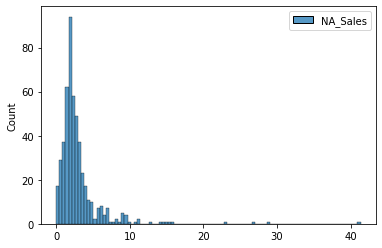

ShapiroResult(statistic=0.5439832210540771, pvalue=5.367239706764889e-34)
(значение статистики, p-value)
ShapiroResult(statistic=0.5439832210540771, pvalue=5.367239706764889e-34)


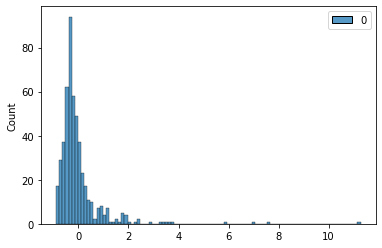

In [67]:
data = df_sales[['NA_Sales']].head(500)
sns.histplot(data)
plt.show()
print(stats.shapiro(data))
print("(значение статистики, p-value)")

sns.histplot(preprocessing.StandardScaler().fit_transform(data))
print(stats.shapiro(preprocessing.StandardScaler().fit_transform(data)))

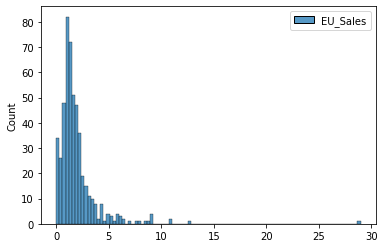

ShapiroResult(statistic=0.5887093544006348, pvalue=1.06935712917662e-32)
(значение статистики, p-value)
ShapiroResult(statistic=0.58870929479599, pvalue=1.0693449334227302e-32)


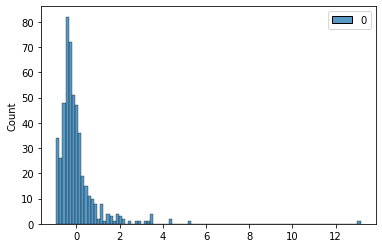

In [68]:
data = df_sales[['EU_Sales']].head(500)
sns.histplot(data)
plt.show()
print(stats.shapiro(data))
print("(значение статистики, p-value)")

sns.histplot(preprocessing.StandardScaler().fit_transform(data))
print(stats.shapiro(preprocessing.StandardScaler().fit_transform(data)))

p-value очень маленькое и при увличении количества данных p-value стремить к 0 в обоих случаях

## Задание 2

1. Как вы можете видеть, некоторые признаки имеют пропуски. Вам необходимо заполнить данные пропуски несколькими различными способами (среднее, медиана, мода). Заодно вспоминаем, что означает каждый из терминов!  
2. Просто выбросите те строки, в которых есть хотя бы одно значение типа NaN. Сколько осталось строк после этого преобразования? Стоит ли применять подобный подход в данном случае?
3. Отдельно прошу подумать над случаями, когда NaN стоит в целевом параметре. Что будете делать с этими строками?

In [69]:
df_sales.shape[0]

16719

In [70]:
df_sales.dropna().shape[0]

6825

Количество строк без Nan стало в 3 раза меньше, чтотне хорошо для обучения модели. Такой подход не очень хорош

In [71]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [72]:
df_sales = df_sales.fillna(df_sales.mean())

In [73]:
df_sales['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [74]:
df_sales.loc[df_sales['User_Score']=='tbd', 'User_Score'] = 0

In [75]:
df_sales.loc[df_sales['User_Score']=='nan', 'User_Score'] = 0

In [76]:
df_sales['User_Score'] = df_sales['User_Score'].astype(float)

In [77]:
df_sales['User_Score'] = df_sales['User_Score'].fillna(df_sales['User_Score'].mean())

In [78]:
df_sales['User_Score'].unique()

array([8.        , 5.39981028, 8.3       , 8.5       , 6.6       ,
       8.4       , 8.6       , 7.7       , 6.3       , 7.4       ,
       8.2       , 9.        , 7.9       , 8.1       , 8.7       ,
       7.1       , 3.4       , 5.3       , 4.8       , 3.2       ,
       8.9       , 6.4       , 7.8       , 7.5       , 2.6       ,
       7.2       , 9.2       , 7.        , 7.3       , 4.3       ,
       7.6       , 5.7       , 5.        , 9.1       , 6.5       ,
       0.        , 8.8       , 6.9       , 9.4       , 6.8       ,
       6.1       , 6.7       , 5.4       , 4.        , 4.9       ,
       4.5       , 9.3       , 6.2       , 4.2       , 6.        ,
       3.7       , 4.1       , 5.8       , 5.6       , 5.5       ,
       4.4       , 4.6       , 5.9       , 3.9       , 3.1       ,
       2.9       , 5.2       , 3.3       , 4.7       , 5.1       ,
       3.5       , 2.5       , 1.9       , 3.        , 2.7       ,
       2.2       , 2.        , 9.5       , 2.1       , 3.6    

In [79]:
df_sales['Developer'] = df_sales['Developer'].fillna('No name')

In [80]:
df_sales['Rating'] = df_sales['Rating'].fillna('No rating')

In [81]:
df_sales['Genre'] = df_sales['Genre'].fillna('No genre')

In [82]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16719 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  float64
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


## Задание 3

Теперь преобразуйте категориальные признаки в такой вид, который можно корректно подать на вход классификатору типа "Логистическая регрессия".

In [83]:
df_sales.values[:, [1]]

array([['Wii'],
       ['NES'],
       ['Wii'],
       ...,
       ['PSV'],
       ['GBA'],
       ['PSV']], dtype=object)

In [84]:
enc_2 = OneHotEncoder()
enc_2.fit(df_sales[['Platform']])
states = df_sales.values[:, [1]]
encoded_ds = enc_2.transform(states).toarray()

In [85]:
encoded_ds.shape

(16719, 31)

In [86]:
enc_2.get_feature_names()

array(['x0_2600', 'x0_3DO', 'x0_3DS', 'x0_DC', 'x0_DS', 'x0_GB', 'x0_GBA',
       'x0_GC', 'x0_GEN', 'x0_GG', 'x0_N64', 'x0_NES', 'x0_NG', 'x0_PC',
       'x0_PCFX', 'x0_PS', 'x0_PS2', 'x0_PS3', 'x0_PS4', 'x0_PSP',
       'x0_PSV', 'x0_SAT', 'x0_SCD', 'x0_SNES', 'x0_TG16', 'x0_WS',
       'x0_Wii', 'x0_WiiU', 'x0_X360', 'x0_XB', 'x0_XOne'], dtype=object)

In [87]:
pl_df = pd.DataFrame(encoded_ds,
             columns=enc_2.get_feature_names())
pl_df.head()

,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,...,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df_sales_ = pd.concat((df_sales, pl_df), 
                         axis=1)

In [89]:
df_sales_.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df_sales_ = pd.get_dummies(df_sales_, 
               columns=['Platform'])

In [91]:
df_sales_.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,...,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,...,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_sales_['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'No genre'], dtype=object)

In [93]:
df_sales_.values[:, [2]]

array([['Sports'],
       ['Platform'],
       ['Racing'],
       ...,
       ['Adventure'],
       ['Platform'],
       ['Simulation']], dtype=object)

In [94]:
enc_1 = OneHotEncoder()
enc_1.fit(df_sales_[['Genre']])
states = df_sales_.values[:, [2]]
encoded_ds = enc_1.transform(states).toarray()

In [95]:
encoded_ds.shape

(16719, 13)

In [96]:
enc_1.get_feature_names()

array(['x0_Action', 'x0_Adventure', 'x0_Fighting', 'x0_Misc',
       'x0_No genre', 'x0_Platform', 'x0_Puzzle', 'x0_Racing',
       'x0_Role-Playing', 'x0_Shooter', 'x0_Simulation', 'x0_Sports',
       'x0_Strategy'], dtype=object)

In [97]:
gn_df = pd.DataFrame(encoded_ds,
             columns=enc_1.get_feature_names())
gn_df.head()

,x0_Action,x0_Adventure,x0_Fighting,x0_Misc,x0_No genre,x0_Platform,x0_Puzzle,x0_Racing,x0_Role-Playing,x0_Shooter,x0_Simulation,x0_Sports,x0_Strategy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [98]:
df_sales_2 = pd.concat((df_sales_, gn_df), 
                         axis=1)

In [99]:
df_sales_2.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,x0_Misc,x0_No genre,x0_Platform,x0_Puzzle,x0_Racing,x0_Role-Playing,x0_Shooter,x0_Simulation,x0_Sports,x0_Strategy
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [100]:
df_sales_2 = pd.get_dummies(df_sales_, 
               columns=['Genre'])

In [101]:
df_sales_2.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Genre_Misc,Genre_No genre,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Wii Sports,2006.0,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,...,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,...,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,2008.0,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,2009.0,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,...,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,...,0,0,0,0,0,1,0,0,0,0


In [102]:
df_sales_2['Rating'].unique()

array(['E', 'No rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [103]:
df_sales_2.values[:, [13]]

array([['E'],
       ['No rating'],
       ['E'],
       ...,
       ['No rating'],
       ['No rating'],
       ['No rating']], dtype=object)

In [104]:
enc_ = LabelEncoder()
enc_.fit(df_sales_2[['Rating']])
states = df_sales_2.values[:, [13]]
encoded_ds = enc_.transform(states)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [105]:
r_df = pd.DataFrame(encoded_ds)
r_df_ = r_df.rename(columns=lambda x:'Rating1')
r_df_.head()

,Rating1
0,1
1,6
2,1
3,1
4,6


In [106]:
df_sales_3 = pd.concat((df_sales_2, r_df_), 
                         axis=1)

In [107]:
df_sales_3.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Genre_No genre,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating1
0,Wii Sports,2006.0,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,...,0,0,0,0,0,0,0,1,0,1
1,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,...,0,1,0,0,0,0,0,0,0,6
2,Mario Kart Wii,2008.0,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,...,0,0,0,1,0,0,0,0,0,1
3,Wii Sports Resort,2009.0,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,...,0,0,0,0,0,0,0,1,0,1
4,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,...,0,0,0,0,1,0,0,0,0,6


In [108]:
df_sales_3 = df_sales_3.drop(['Rating'], axis = 1)


In [109]:
df_sales_3.columns

Index(['Name', 'Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'x0_2600',
       'x0_3DO', 'x0_3DS', 'x0_DC', 'x0_DS', 'x0_GB', 'x0_GBA', 'x0_GC',
       'x0_GEN', 'x0_GG', 'x0_N64', 'x0_NES', 'x0_NG', 'x0_PC', 'x0_PCFX',
       'x0_PS', 'x0_PS2', 'x0_PS3', 'x0_PS4', 'x0_PSP', 'x0_PSV', 'x0_SAT',
       'x0_SCD', 'x0_SNES', 'x0_TG16', 'x0_WS', 'x0_Wii', 'x0_WiiU', 'x0_X360',
       'x0_XB', 'x0_XOne', 'Platform_2600', 'Platform_3DO', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GB', 'Platform_GBA',
       'Platform_GC', 'Platform_GEN', 'Platform_GG', 'Platform_N64',
       'Platform_NES', 'Platform_NG', 'Platform_PC', 'Platform_PCFX',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_SAT', 'Platform_SCD',
       'Platform_SNES', 'Platform_TG16', 'Platform_WS', 'Pla

## Задание 4

Нормализуйте непрерывные признаки с помощью функции StandardScaler (или RobustScaler, на выбор).
Используя функцию `cross_val_score` модуля `model_selection`, обучите логистическую регрессию. Для функции потерь можно использовать всё тот же `neg_log_loss` (отдельно разберем метрики на следующем занятии)

In [110]:
df_sales_3['Rating1'].unique()

array([1, 6, 5, 8, 2, 4, 0, 3, 7])

In [111]:
y_train = df_sales_3['Rating1']

In [112]:
x_train  = df_sales_3.drop(['Rating1','Name','Publisher','Developer'], axis = 1)

In [113]:
x_train.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Genre_Misc,Genre_No genre,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,...,0,0,0,0,0,0,0,0,1,0
1,1985.0,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908,...,0,0,1,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,...,0,0,0,0,0,0,0,0,1,0
4,1996.0,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908,...,0,0,0,0,0,1,0,0,0,0


In [114]:
scaler = preprocessing.StandardScaler()

In [115]:
trans_data = scaler.fit_transform(x_train.values)

In [116]:
y_train.value_counts()

6    6769
1    3991
8    2961
5    1563
2    1420
3       8
7       3
4       3
0       1
Name: Rating1, dtype: int64

In [117]:
model_selection.cross_val_score(
    linear_model.LogisticRegression(), 
    trans_data, 
    y_train
).mean()

C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lea

0.6102651294499541

## Задание 5

Обучите теперь просто на всем датасете логистическую регрессию разово (без использования `cross_val_score`). Определите по итогам обучения Логистической регрессии, какие из признаков являются самыми важными, а какие менее важными. Постройте график важности признаков (как строили на уроке).

In [118]:
x_train.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Genre_Misc,Genre_No genre,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,...,0,0,0,0,0,0,0,0,1,0
1,1985.0,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908,...,0,0,1,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,...,0,0,0,0,0,0,0,0,1,0
4,1996.0,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908,...,0,0,0,0,0,1,0,0,0,0


In [120]:
lr = linear_model.LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
lr_predict[:30], np.array(y_train[:30])

(array([1, 1, 5, 1, 1, 1, 8, 1, 5, 1, 1, 8, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1,
        1, 5, 5, 1, 1, 1, 8, 5]),
 array([1, 6, 1, 1, 6, 6, 1, 1, 1, 6, 6, 1, 6, 1, 1, 1, 5, 5, 6, 1, 6, 6,
        6, 5, 5, 6, 1, 6, 1, 5]))

In [122]:
lr.coef_

array([[-4.33613800e-03,  1.95144059e-04,  9.31643091e-05,
        -1.42032689e-05,  9.73505538e-06,  2.81887795e-04,
         4.57162227e-03,  6.09596142e-03,  5.62386847e-04,
         2.09168076e-03, -1.66294489e-06, -3.57688183e-08,
        -5.84831873e-06, -6.01860663e-07, -2.41911016e-05,
        -1.17599687e-06, -9.16464265e-06, -6.79890924e-06,
        -3.54061095e-07, -1.20663359e-08, -3.77722011e-06,
        -1.21479361e-06, -1.43143281e-07, -8.34535610e-06,
        -1.18584106e-08, -1.37864381e-05, -2.72347420e-05,
        -1.51981108e-05, -3.81496247e-06, -1.44017179e-05,
        -4.86171732e-06, -2.04875112e-06, -7.21200248e-08,
        -2.86504897e-06, -2.38521373e-08, -7.03008746e-08,
        -1.52667422e-05, -1.42855108e-06, -1.46869219e-05,
         1.79419438e-04, -2.36744833e-06, -1.66294489e-06,
        -3.57688183e-08, -5.84831873e-06, -6.01860663e-07,
        -2.41911016e-05, -1.17599687e-06, -9.16464265e-06,
        -6.79890924e-06, -3.54061095e-07, -1.20663359e-0

In [123]:
coef_df = pd.DataFrame(list(zip(x_train.columns[:-1], lr.coef_[0])),
                       columns=['col', 'weight']
                      )
coef_df

,col,weight
0,Year_of_Release,-0.004336
1,NA_Sales,0.000195
2,EU_Sales,0.000093
3,JP_Sales,-0.000014
4,Other_Sales,0.000010
...,...,...
79,Genre_Racing,-0.000015
80,Genre_Role-Playing,-0.000017
81,Genre_Shooter,-0.000014
82,Genre_Simulation,-0.000010


In [124]:
coefs_arr = np.array(sorted(list(zip(x_train.columns[:-1], lr.coef_[0]))))

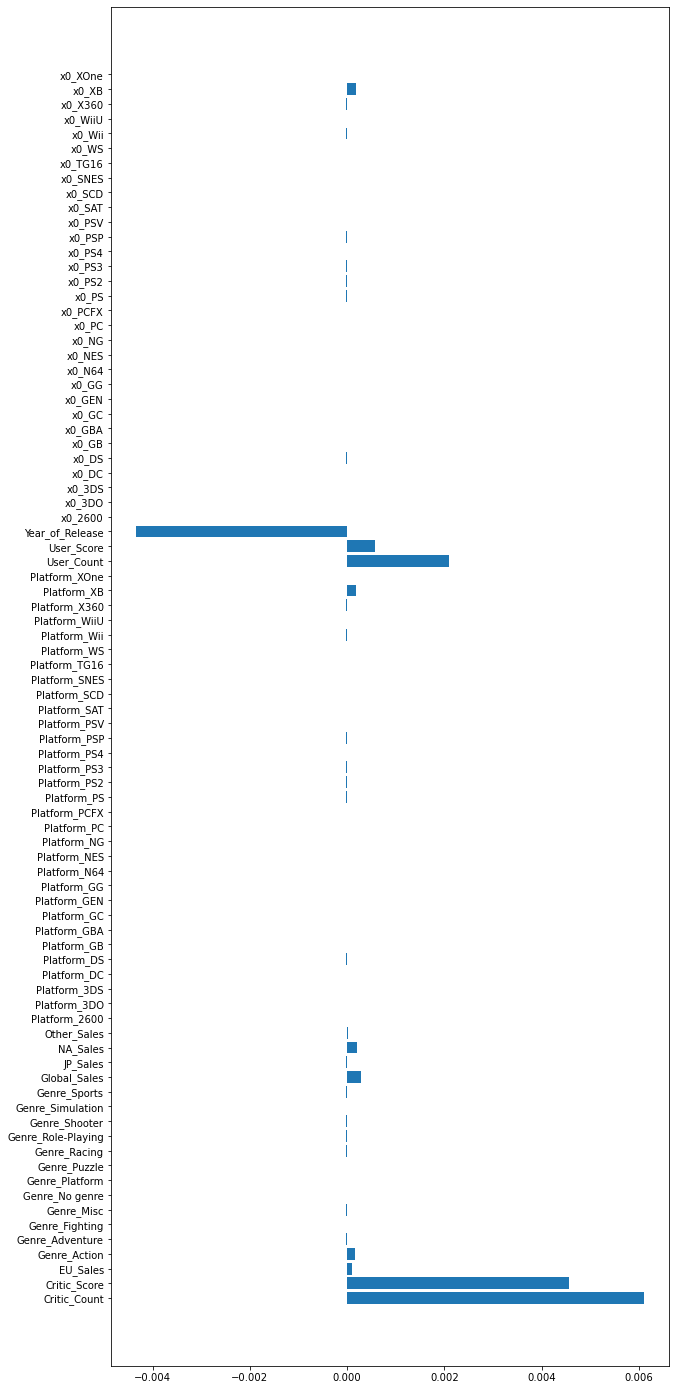

In [125]:
fig = plt.figure(figsize=[10, 25])
plt.barh(coefs_arr[:, 0], coefs_arr[:, 1].astype(float))
plt.show()

## Интересные ссылки (для тех, кто хочет знать еще больше!)

Приведу вам парочку просто интересных ссылок (которые, впрочем, расширяют кругозор знаний, но вряд ли помогут с выполнением домашки):
https://github.com/alicezheng/feature-engineering-book/blob/master/07.00_Swiss_roll.ipynb
https://habr.com/ru/company/mailru/blog/346942/